# Kupiec test
## Introduction

Imagine the following situation: you and your friend are trying to decide where to go for lunch, but can’t agree on a place, so you decide to toss a coin. You take out the coin from your pocket, but your friend does not believe that the coin is fair and wants to test it. You throw the coin 10 times and get … 7 heads. Does that mean that the coin is biased? Probably not, You performed only 10 trials, so such a result is not that surprising - it’s statistically insignificant. An analogous problem occurs when we compare the empirical and nominal coverage of our prediction intervals — how to tell whether the difference between the observed frequency of outcomes and the assumed probability is statistically significant? The answer is the Kupiec test.

## Summary
The Kupiec test:
- Checks whether the nominal coverage $\alpha$ and empirical coverage $\pi$ are statistically different
- The null hypothesis $H_0$ states that the PI is well-calibrated, i.e. $\pi \approx \alpha$.
- Assumes that the ***hit or miss*** variables $I_t \in \{0, 1\}$ are independent https://en.wikipedia.org/wiki/Bernoulli_trials (like coin tosses) with success rate $\alpha$:

$$
P(I_t = 1) = \alpha.
$$

The test statistic for the Kupiec test is the **Likelihood Ratio** for **Unconditional Coverage**

$$
LR_{UC} = -2\log\left(\frac{(1-\alpha)^{N_0}\alpha^{N_1}}{(1-\pi)^{N_0}\pi^{N_1}}\right),
$$

where $N_0$ is the number of misses $(I_t = 0)$, $N_1$ is the number of hits $(I_t = 1)$ and $\pi = \frac{N_1}{N_1 + N_0}$ is the empirical coverage.

Note that the fraction inside the logarithm cannot be greater than 1, since the denominator is the maximum of the function $f(x) = (1-x)^{N_0}x^{N_1}$ for $x \in [0, 1]$. It means that the logarithm will be non-positive, and hence $LR_{UC} \geq 0$.

Our $H_0$ states that the empirical coverage approximates the nominal coverage $\alpha$, notice that the closer $\pi$ is to $\alpha$, the closer $LR_{UC}$ is to 0.

You can play with the code snippet below to see how the function $f(x)$ changes with $x$:


Empirical coverage estimated from n0 and n1: 0.9
Argmax of likelihood: 0.9


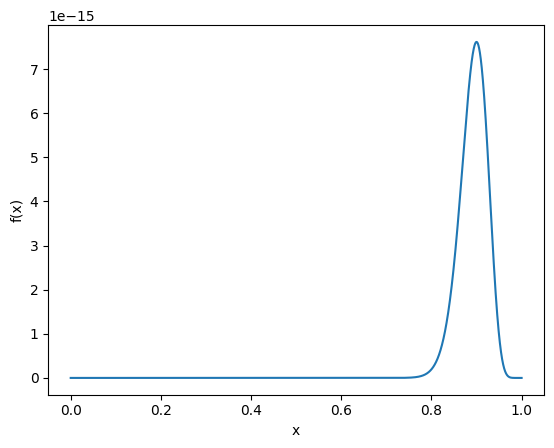

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# play with the values of n0 and n1
n0 = 10
n1 = 90

# define likelihood function
def f(x):
  return ((1-x)**n0)*(x**n1)

# set domain for function f
x = np.linspace(0, 1, 10_001)

print("Empirical coverage estimated from n0 and n1:", n1/(n0+n1))
print("Argmax of likelihood:", x[np.argmax(f(x))])

plt.plot(x, f(x))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

Because we assumed that $I_t$ are Bernoulli trials, we expect that the likelihood ratio follows https://en.wikipedia.org/wiki/Chi-squared_distribution with one degree of freedom, i.e. $LR_{UC} \sim \chi^2(1)$.

The p-value of a statistical test is the probability of obtaining at least as extreme value as the observed one, under the assumption that $H_0$ is true. Therefore, for the Kupiec test the p-value is given by $1-\text{CDF}(LR_{UC})$, because the distribution is right-tailed. The visual scheme is provided below.

![Kupiec test](data/kupiec.png)

### Numerical calculations

If in our numerical calculations we compute the test statistic $LR_{UC}$  according to

$$
LR_{UC} = -2\log\left(\frac{(1-\alpha)^{N_0}\alpha^{N_1}}{(1-\pi)^{N_0}\pi^{N_1}}\right),
$$

then for large values of $N_0$ or $N_1$ we will encounter numerical instability — all four exponents in the argument of the logarithm have a base smaller than 1, therefore they correspond to very small numbers, beyond the precision of the standard floating point arithmetic. Therefore, we will perform a simple transformation of this equation, using two properties of the logarithm: $\log(ab) = \log(a) + \log(b)$ and $\log(a^b) = b\log(a)$. The final expression that we can safely use in the code is:

$$
LR_{UC} = -2N_0\log(1-\alpha)-2N_1\log(\alpha)+2N_0\log(1-\pi)+2N_1\log(\pi)
$$

### Task

Implement a Python function which performs the Kupiec test, the function should work according to the following specification:


In [5]:
def kupiec(n1, n0, alpha):
    """
    Return the p-value of the Kupiec test for the provided arguments:
    - n1: number of hits
    - n0: number of misses
    - alpha: nominal coverage of the prediction interval
    """
    pass

Hints: 

- Calculate the p-value as 1 - CDF of the likelihood ratio you obtained and check if it is smaller than the significance level (if yes, reject the null hypothesis)
- You can use this [Chi-squared implementation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html), e.g. to calculate the CDF at 2.5 for Chi-squared distribution with one degree of freedom, call:


In [ ]:
from scipy.stats import chi2
chi2(1).cdf(2.5)